In [1]:
import time
import chess
import gym
import gym_chess
from tqdm import tqdm

from utils import save_checkpoint, update_game_metrics, load_checkpoint, get_custom_reward
from agents import QLearningAgent

from stockfish import Stockfish
import argparse
import yaml
import json

2023-06-22 07:41:45.325541: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
strategy = 'dqn_white_stockfish'
version = 'v1'

checkpoint = load_checkpoint(strategy, version, iteration='latest')

/Users/jaime.kuei/Documents/study-repositories/master/second-semester/reinforcement-learning/rl-chess-nova-ims/checkpoint/dqn_white_stockfish/v1/iteration_800/checkpoint_agent.pkl
Loading checkpoint from:  iteration_800


----> Loaded Q_dict_white
----> Loaded game_metrics


In [5]:
agent = checkpoint['agent']

In [8]:
agent.epsilon

0.99

In [4]:
checkpoint['game_metrics']['game']

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [54]:
env = gym.make('ChessAlphaZero-v0')
env.reset()

array([[[0, 0, 0, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 1, 0],
        [0, 0, 1, ..., 1, 1, 0],
        ...,
        [0, 0, 1, ..., 1, 1, 0],
        [0, 1, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       [[1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0],
        ...,
        [1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0],
        [1, 0, 0, ..., 1, 1, 0]],

       [[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       ...,

       [[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0]],

       [[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 0, ..., 

In [49]:
env.observation_space.shape

TypeError: 'Box' object is not subscriptable

In [46]:
next_state, reward, done, _ = env.step(730)

In [50]:
state1 = next_state[:,:,:12]
state2 = next_state[:,:,:12]

In [55]:
env.legal_actions

[494,
 501,
 129,
 136,
 1095,
 1022,
 949,
 876,
 803,
 730,
 657,
 584,
 1096,
 1023,
 950,
 877,
 804,
 731,
 658,
 585]

In [56]:
from collections import deque

replay_buffer = deque(maxlen=1000)

state, reward, done, _ = env.step(730)
action = 731
next_state, reward, done, _ = env.step(action)
replay_buffer.append((state, action, reward, done, next_state))
state = next_state

action = 804
next_state, reward, done, _ = env.step(action)
replay_buffer.append((state, action, reward, done, next_state))
state = next_state

action = 950
next_state, reward, done, _ = env.step(action)
replay_buffer.append((state, action, reward, done, next_state))
state = next_state

In [70]:
import numpy as np
import random 

In [81]:
minibatch = np.array(random.sample(replay_buffer, 3), dtype=object)
state_list = np.array(minibatch[:,0], dtype=object)

In [85]:
state_list = np.hstack(state_list).reshape(3, 8, 8, 119)

In [87]:
state_list.shape

(3, 8, 8, 119)

In [ ]:
def store_transistion(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))

In [ ]:
self.store_transistion(state, action, reward, next_state, done)

In [24]:
env.action_space

Discrete(4672)

In [31]:
env.decode(2000)

AttributeError: 'NoneType' object has no attribute 'piece_type'

In [15]:
for i in range(100):
    print(env.action_space.sample())

3001
2872
3871
2648
3275
571
2459
2741
4047
2999
485
1269
3593
4219
524
2313
2480
2834
3856
132
4035
2262
1349
2649
3454
2178
72
790
1201
479
623
2407
3599
1970
4322
1699
1757
4179
3450
918
4368
3722
3849
3545
924
247
3436
4192
1627
1553
870
2498
4374
4559
683
2336
4601
474
3906
4103
3731
2622
1178
2416
3290
4134
2342
4358
4041
2162
494
2037
2351
270
1222
3390
2788
2389
3644
2396
1623
635
4188
238
3592
359
4579
3430
1857
2008
3848
2053
645
2758
4206
2489
2332
4042
3015
1100


In [6]:
# order dict from highest to lowest
def dict_sort(d):
    return dict(sorted(d.items(), key=lambda x: x[1], reverse=True))

# print dict in order
dict_sort(values)

{4385: 0.9997244926071289,
 2217: 0.999632656809581,
 49: 0.9995408210120331,
 4434: 0.999265313619162,
 2266: 0.9991734778218415,
 98: 0.9990816420240662,
 4483: 0.9988061346311952,
 2315: 0.9987142988338746,
 147: 0.9986224630360994,
 4532: 0.998346955643683,
 2364: 0.9982551198459078,
 196: 0.9981632840481325,
 4581: 0.9978877766552614,
 2413: 0.9977959408579409,
 245: 0.9977041050601656,
 4630: 0.9974285976677493,
 2462: 0.997336761869974,
 294: 0.9972449260721987,
 4679: 0.9969694186793276,
 2511: 0.9968775828820071,
 343: 0.9967857470842318,
 4728: 0.9965102396918155,
 2560: 0.9964184038940402,
 392: 0.996326568096265,
 4777: 0.9960510607033939,
 2609: 0.9959592249060734,
 441: 0.9958673891082981,
 4826: 0.9955918817158818,
 2658: 0.9955000459181065,
 490: 0.9954082101203312,
 4875: 0.9951327027274601,
 2707: 0.9950408669301396,
 539: 0.9949490311323643,
 4924: 0.994673523739948,
 2756: 0.9945816879421727,
 588: 0.9944898521443974,
 4973: 0.9942143447515264,
 2805: 0.994122508954

In [32]:
# Import the libraries required in this example:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (NumPy arrays):
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Allocate 10,000 samples for validation:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Minimize loss:
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # Monitor metrics:
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # Validation of loss and metrics
    # at the end of each epoch:
    validation_data=(x_val, y_val),
)

history.history

print("Evaluate model on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(x_test[:1])
print("prediction shape:", prediction.shape)

11490434/11490434 [==============================] - 8s 1us/step
Fit model on training data
Epoch 1/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3392 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.1867 - val_sparse_categorical_accuracy: 0.9466
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.1591 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.1314 - val_sparse_categorical_accuracy: 0.9630
Evaluate model on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.1302 - sparse_categorical_accuracy: 0.9603
test loss, test acc: [0.13022162020206451, 0.9603000283241272]
Generate a prediction
1/1 [==============================] - 0s 79ms/step
prediction shape: (1, 10)


In [33]:
prediction

array([[6.5909412e-06, 4.3930575e-07, 1.8799146e-04, 2.0909435e-04,
        6.2949766e-08, 7.2605559e-07, 6.7664069e-11, 9.9947935e-01,
        2.2602323e-06, 1.1346632e-04]], dtype=float32)

In [38]:
import numpy as np

legal_actions = [0,3,5]

In [37]:
np.argmax(prediction.flatten())

7

In [40]:
{action: prediction.flatten()[action] for action in legal_actions}

{0: 6.590941e-06, 3: 0.00020909435, 5: 7.260556e-07}

In [41]:
dictionary = {action: prediction.flatten()[action] for action in legal_actions}

# take the key of the dictionary that contains the highest number
# if the values of the dictionary tied, take a random key
best_action = max(dictionary, key=dictionary.get)

In [42]:
best_actions = []

In [43]:
state[:,:,:12]

3

In [9]:
import math

math.log(5, 10)

0.6989700043360187

In [22]:
big_number = 100000
low_number = 100

for base in range(2,50):
    precision_big = round(1/math.log(big_number, base), 2)
    precision_low = round(1/math.log(low_number, base), 2)
    importance = round(precision_low/precision_big,2)

    print(f'base: {base}, precision_big: {precision_big}, precision_low: {precision_low}, importance: {importance}')

base: 2, precision_big: 0.05, precision_low: 0.12, importance: 2.4
base: 3, precision_big: 0.07, precision_low: 0.14, importance: 2.0
base: 4, precision_big: 0.08, precision_low: 0.14, importance: 1.75
base: 5, precision_big: 0.08, precision_low: 0.13, importance: 1.62
base: 6, precision_big: 0.08, precision_low: 0.12, importance: 1.5
base: 7, precision_big: 0.08, precision_low: 0.11, importance: 1.38
base: 8, precision_big: 0.07, precision_low: 0.1, importance: 1.43
base: 9, precision_big: 0.07, precision_low: 0.09, importance: 1.29
base: 10, precision_big: 0.07, precision_low: 0.08, importance: 1.14
base: 11, precision_big: 0.06, precision_low: 0.08, importance: 1.33
base: 12, precision_big: 0.06, precision_low: 0.07, importance: 1.17
base: 13, precision_big: 0.06, precision_low: 0.07, importance: 1.17
base: 14, precision_big: 0.05, precision_low: 0.06, importance: 1.2
base: 15, precision_big: 0.05, precision_low: 0.06, importance: 1.2
base: 16, precision_big: 0.05, precision_low: 0.

In [23]:
big_number = 100000
low_number = 100

for base in range(2,50):
    precision_big = round(1/math.exp(big_number), 2)
    precision_low = round(1/math.exp(low_number), 2)
    importance = round(precision_low/precision_big,2)

    print(f'base: {base}, precision_big: {precision_big}, precision_low: {precision_low}, importance: {importance}')

OverflowError: math range error

In [32]:
100000**(1/10)

3.1622776601683795

In [33]:
1/math.log(100000, 3.16)

0.09993741652368077

In [34]:
1/math.log(100,3.16)

0.2498435413092019

In [35]:
0.25/0.1

2.5

In [14]:
1/math.log(low_number, 10)

0.5

In [96]:
minitem = 30
constraint_value = math.log(minitem)
bigger_value = math.log(100000)
lower_value = math.log(100)

formula = 1#-constraint_value + 0.001

In [134]:
big_value = 300000
small_value = 30
formula = 30

def calculate_weight(value):
    # bias = (math.log(1000*30) - 100*math.log(30))/9
    return (1/(-formula+0.00001+math.log(value)))

print(calculate_weight(small_value)/calculate_weight(big_value))

0.6537308853024272


In [128]:
import numpy as np

results = []

for formula in np.arange(0.0,30.0, 1):
    def calculate_weight(value, formula):
        # bias = (math.log(1000*30) - 100*math.log(30))/9
        return (1/(-formula+0.0001+math.log(value)))
    
    big_value = 30
    small_value = 30
    big_value2 = 100000
    small_value2 = 100
    print(
        'lower', 
        formula, 
        'weight low', 
        round(calculate_weight(small_value, formula)/calculate_weight(big_value, formula),2),
        'weight high', 
        round(calculate_weight(small_value2, formula)/calculate_weight(big_value2, formula),2)
    )
    dict_results = {
            'bias': formula, 
            'weight low': round(calculate_weight(small_value, formula)/calculate_weight(big_value, formula),2),
            'weight high': round(calculate_weight(small_value2, formula)/calculate_weight(big_value2, formula),2)
        }
    results.append(dict_results)

lower 0.0 weight low 1.0 weight high 2.5
lower 1.0 weight low 1.0 weight high 2.92
lower 2.0 weight low 1.0 weight high 3.65
lower 3.0 weight low 1.0 weight high 5.3
lower 4.0 weight low 1.0 weight high 12.41
lower 5.0 weight low 1.0 weight high -16.5
lower 6.0 weight low 1.0 weight high -3.95
lower 7.0 weight low 1.0 weight high -1.88
lower 8.0 weight low 1.0 weight high -1.03
lower 9.0 weight low 1.0 weight high -0.57
lower 10.0 weight low 1.0 weight high -0.28
lower 11.0 weight low 1.0 weight high -0.08
lower 12.0 weight low 1.0 weight high 0.07
lower 13.0 weight low 1.0 weight high 0.18
lower 14.0 weight low 1.0 weight high 0.26
lower 15.0 weight low 1.0 weight high 0.34
lower 16.0 weight low 1.0 weight high 0.39
lower 17.0 weight low 1.0 weight high 0.44
lower 18.0 weight low 1.0 weight high 0.48
lower 19.0 weight low 1.0 weight high 0.52
lower 20.0 weight low 1.0 weight high 0.55
lower 21.0 weight low 1.0 weight high 0.58
lower 22.0 weight low 1.0 weight high 0.6
lower 23.0 weigh

In [129]:
import pandas as pd

In [130]:
pd.DataFrame(results)

,bias,weight low,weight high
0,0.0,1.0,2.50
1,1.0,1.0,2.92
2,2.0,1.0,3.65
3,3.0,1.0,5.30
4,4.0,1.0,12.41
5,5.0,1.0,-16.50
6,6.0,1.0,-3.95
7,7.0,1.0,-1.88
8,8.0,1.0,-1.03
9,9.0,1.0,-0.57


In [106]:
weight = (
    (formula + bigger_value)/(formula + constraint_value)
)

weight

1.9771756663957138

In [139]:
def calculate_weights(value, bias):
    return (1/(-bias+0.0001+math.log(value)))

calculate_weights(30, bias=3.4)

770.7832083416191

In [185]:
def calculate_weights(value, bias):
    return (1/(-bias+math.log(value)))

for i in np.arange(0.0, round(math.log(30)*0.9, 1), 0.01):
    small_value = 30
    big_value = 31

    small_value2 = 100
    big_value2 = 100000

    if i > math.log(30):
        print(i)

    dict_results = {
            'bias': i, 
            'weight low': round(calculate_weights(small_value, i)/calculate_weights(big_value, i),2),
            'weight high': round(calculate_weights(small_value2, i)/calculate_weights(big_value2, i),2)
        }
    results.append(dict_results)

In [181]:
import os 
os.getcwd()

'/Users/jaime.kuei/Documents/study-repositories/master/second-semester/reinforcement-learning/rl-chess-nova-ims'

In [183]:
results_df = pd.DataFrame(results)
results_df.describe()

,bias,weight low,weight high
count,1528.000000,1528.000000,1528.000000
mean,1.907428,1.073855,3.589993
std,2.357576,0.957039,1.241827
min,0.000000,1.000000,-16.500000
25%,0.837500,1.010000,2.810000
50%,1.690000,1.020000,3.315000
75%,2.530000,1.040000,4.250000
max,29.000000,28.380000,12.410000


In [177]:
import os

results_df = pd.DataFrame(results)

#save csv
results_df.to_csv(os.path.join(os.getcwd(), 'results.csv'), index=False)

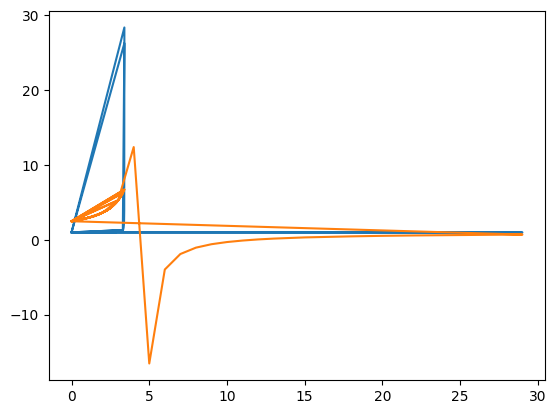

In [161]:
#import library plt
import matplotlib.pyplot as plt

results_df = pd.DataFrame(results)

#plot two lines with x axis with the column bias and y axis the columns weight low and weight high
plt.plot(results_df['bias'], results_df['weight low'], label='bias')
plt.plot(results_df['bias'], results_df['weight high'], label='bias')

In [168]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ifoodcorp.com.br
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='bias', ylabel='weight low'>

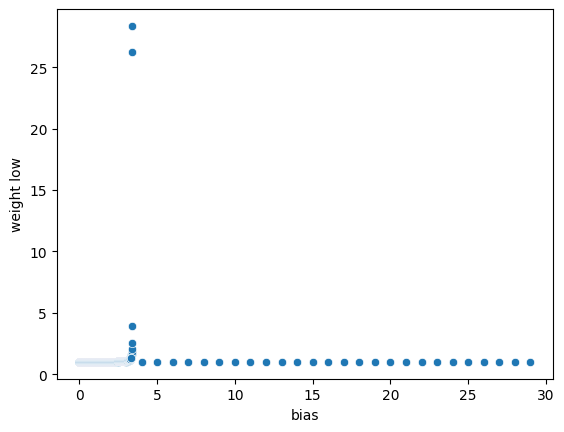

In [169]:
#plot scatter plot with x axis with the column bias and y axis the column weight low
import seaborn as sns
sns.scatterplot(data=results_df, x="bias", y="weight low")

In [164]:
results_df.bar.plot('bias', 'weight low')

AttributeError: 'DataFrame' object has no attribute 'bar'